In [1]:
print(
'''
***************************
*   Classification Task   *
***************************
'''
)


***************************
*   Classification Task   *
***************************



In [2]:
# Install packages

!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [3]:
# Suppress all warnings

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

In [5]:
# Load the dataset

dataset = pd.read_csv('loan_approval_dataset.csv')  

In [6]:
# Exploratory Data Analysis (EDA)

In [7]:
# View dimensions of dataset

dataset.shape

(4269, 13)

In [8]:
# Preview a specific column of dataset

dataset[' loan_status']

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name:  loan_status, Length: 4269, dtype: object

In [9]:
# Preview the unique values of a specific column of dataset

dataset.iloc[:,-1].unique()

array([' Approved', ' Rejected'], dtype=object)

In [10]:
# Preview the dataset

dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12.0,778.0,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8.0,417.0,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20.0,506.0,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8.0,467.0,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20.0,382.0,12400000,8200000,29400000,5000000,Rejected


In [11]:
# Preview the dataset

dataset.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12.0,317.0,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20.0,559.0,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18.0,457.0,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8.0,780.0,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10.0,607.0,17800000,11800000,35700000,12000000,Approved


In [12]:
# View summary of dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   loan_id                    4269 non-null   int64  
 1    no_of_dependents          4269 non-null   int64  
 2    education                 4269 non-null   object 
 3    self_employed             4267 non-null   object 
 4    income_annum              4269 non-null   int64  
 5    loan_amount               4269 non-null   int64  
 6    loan_term                 4266 non-null   float64
 7    cibil_score               4265 non-null   float64
 8    residential_assets_value  4269 non-null   int64  
 9    commercial_assets_value   4269 non-null   int64  
 10   luxury_assets_value       4269 non-null   int64  
 11   bank_asset_value          4269 non-null   int64  
 12   loan_status               4269 non-null   object 
dtypes: float64(2), int64(8), object(3)
memory usage:

In [13]:
# Provide a quick overview of the distribution of data

dataset.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4267,4.269000e+03,4.269000e+03,4266.000000,4265.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.904829,599.876905,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.708416,172.377384,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [14]:
# Check the names of the columns

dataset.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

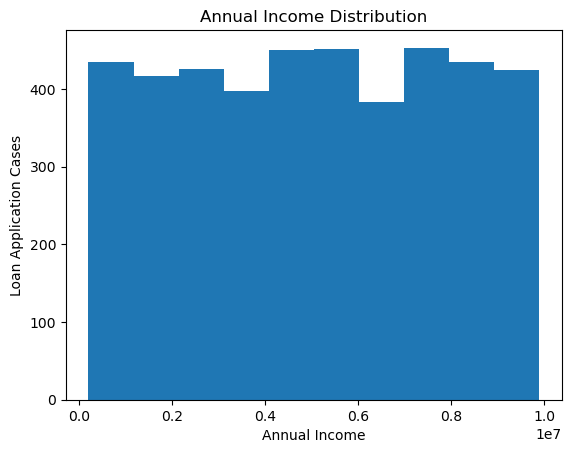

In [15]:
# Visual representation of a specific feature

plt.hist(dataset[' income_annum'])
plt.xlabel('Annual Income')
plt.ylabel('Loan Application Cases')
plt.title('Annual Income Distribution')
plt.show()

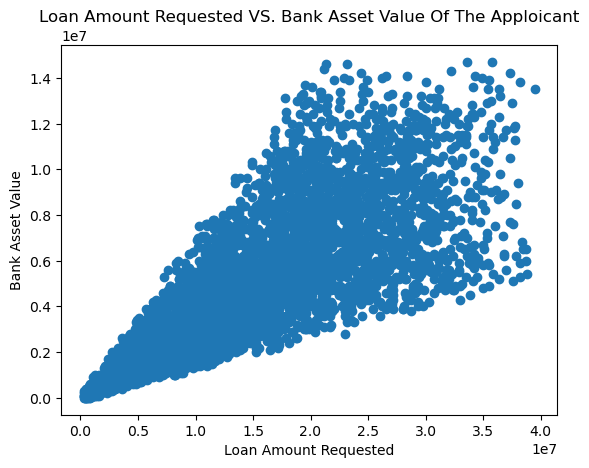

In [16]:
# Visual exploration the relationship between two features

plt.scatter(dataset[' loan_amount'],dataset[' bank_asset_value'])
plt.xlabel('Loan Amount Requested')
plt.ylabel('Bank Asset Value')
plt.title('Loan Amount Requested VS. Bank Asset Value Of The Apploicant')
plt.show()

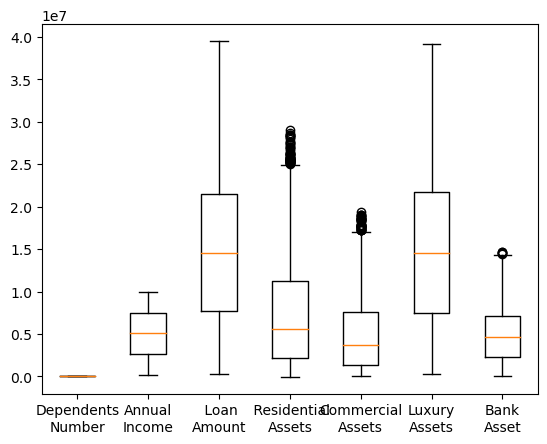

In [17]:
# Visualizing the distribution of various categorical features

plt.boxplot(x=[dataset[' no_of_dependents'], dataset[' income_annum'], dataset[' loan_amount'], dataset[' residential_assets_value'], dataset[' commercial_assets_value'], dataset[' luxury_assets_value'], dataset[' bank_asset_value']])
plt.xticks([1,2,3,4,5,6,7],['Dependents\nNumber','Annual\nIncome',' Loan\nAmount',' Residential\nAssets','Commercial\nAssets','Luxury\nAssets','Bank\nAsset'])
plt.show()

In [18]:
# Explore a specific variable

education_counts=pd.DataFrame(dataset[' education'].value_counts())
education_counts.head()

,count
education,
Graduate,2144
Not Graduate,2125


<Axes: xlabel=' education', ylabel='count'>

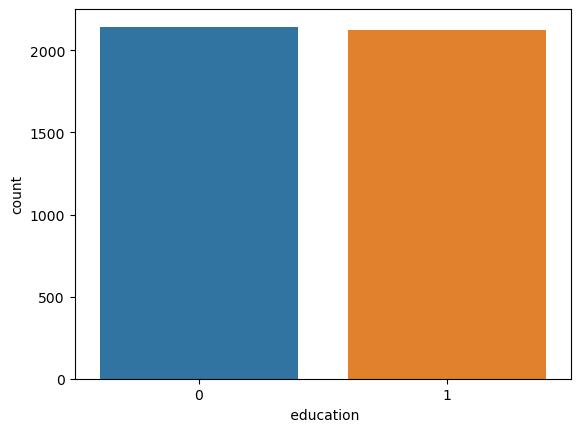

In [50]:
# Visualize the distribution of a feature

sns.countplot(dataset, x=' education')

In [20]:
# Data Cleaning

In [21]:
# Check missing values

dataset.iloc[:,:].isnull().values.any()

True

In [22]:
# Count of missing values in each column

dataset.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               2
 income_annum                0
 loan_amount                 0
 loan_term                   3
 cibil_score                 4
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [23]:
# Handle missing values

numImputer=SimpleImputer(missing_values=np.nan , strategy='mean')
numImputer=numImputer.fit(dataset[[' loan_term', ' cibil_score']])
dataset[[' loan_term', ' cibil_score']]=numImputer.transform(dataset[[' loan_term', ' cibil_score']])
catImputer=SimpleImputer(missing_values=np.nan ,strategy='most_frequent')
catImputer=catImputer.fit([[' self_employed']])
dataset[[' self_employed']]=catImputer.transform(dataset[[' self_employed']])
dataset

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12.0,778.0,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8.0,417.0,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20.0,506.0,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8.0,467.0,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20.0,382.0,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12.0,317.0,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20.0,559.0,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18.0,457.0,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8.0,780.0,8200000,700000,14100000,5800000,Approved


In [24]:
# Check for duplicates

duplicated = dataset.duplicated()
print("Duplicate Rows:")
print(dataset[duplicated])
dataset_no_duplicates = dataset.drop_duplicates()

Duplicate Rows:
Empty DataFrame
Columns: [loan_id,  no_of_dependents,  education,  self_employed,  income_annum,  loan_amount,  loan_term,  cibil_score,  residential_assets_value,  commercial_assets_value,  luxury_assets_value,  bank_asset_value,  loan_status]
Index: []


In [25]:
dataset.duplicated().sum()

0

In [26]:
# Handle different types of data

categorical_columns = [' education',' self_employed',' loan_status']

label_encoder = LabelEncoder()

for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [27]:
# Preview normalized dataset

dataset

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12.0,778.0,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8.0,417.0,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20.0,506.0,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8.0,467.0,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20.0,382.0,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12.0,317.0,2800000,500000,3300000,800000,1
4265,4266,0,1,1,3300000,11300000,20.0,559.0,4200000,2900000,11000000,1900000,0
4266,4267,2,1,0,6500000,23900000,18.0,457.0,1200000,12400000,18100000,7300000,1
4267,4268,1,1,0,4100000,12800000,8.0,780.0,8200000,700000,14100000,5800000,0


<Axes: >

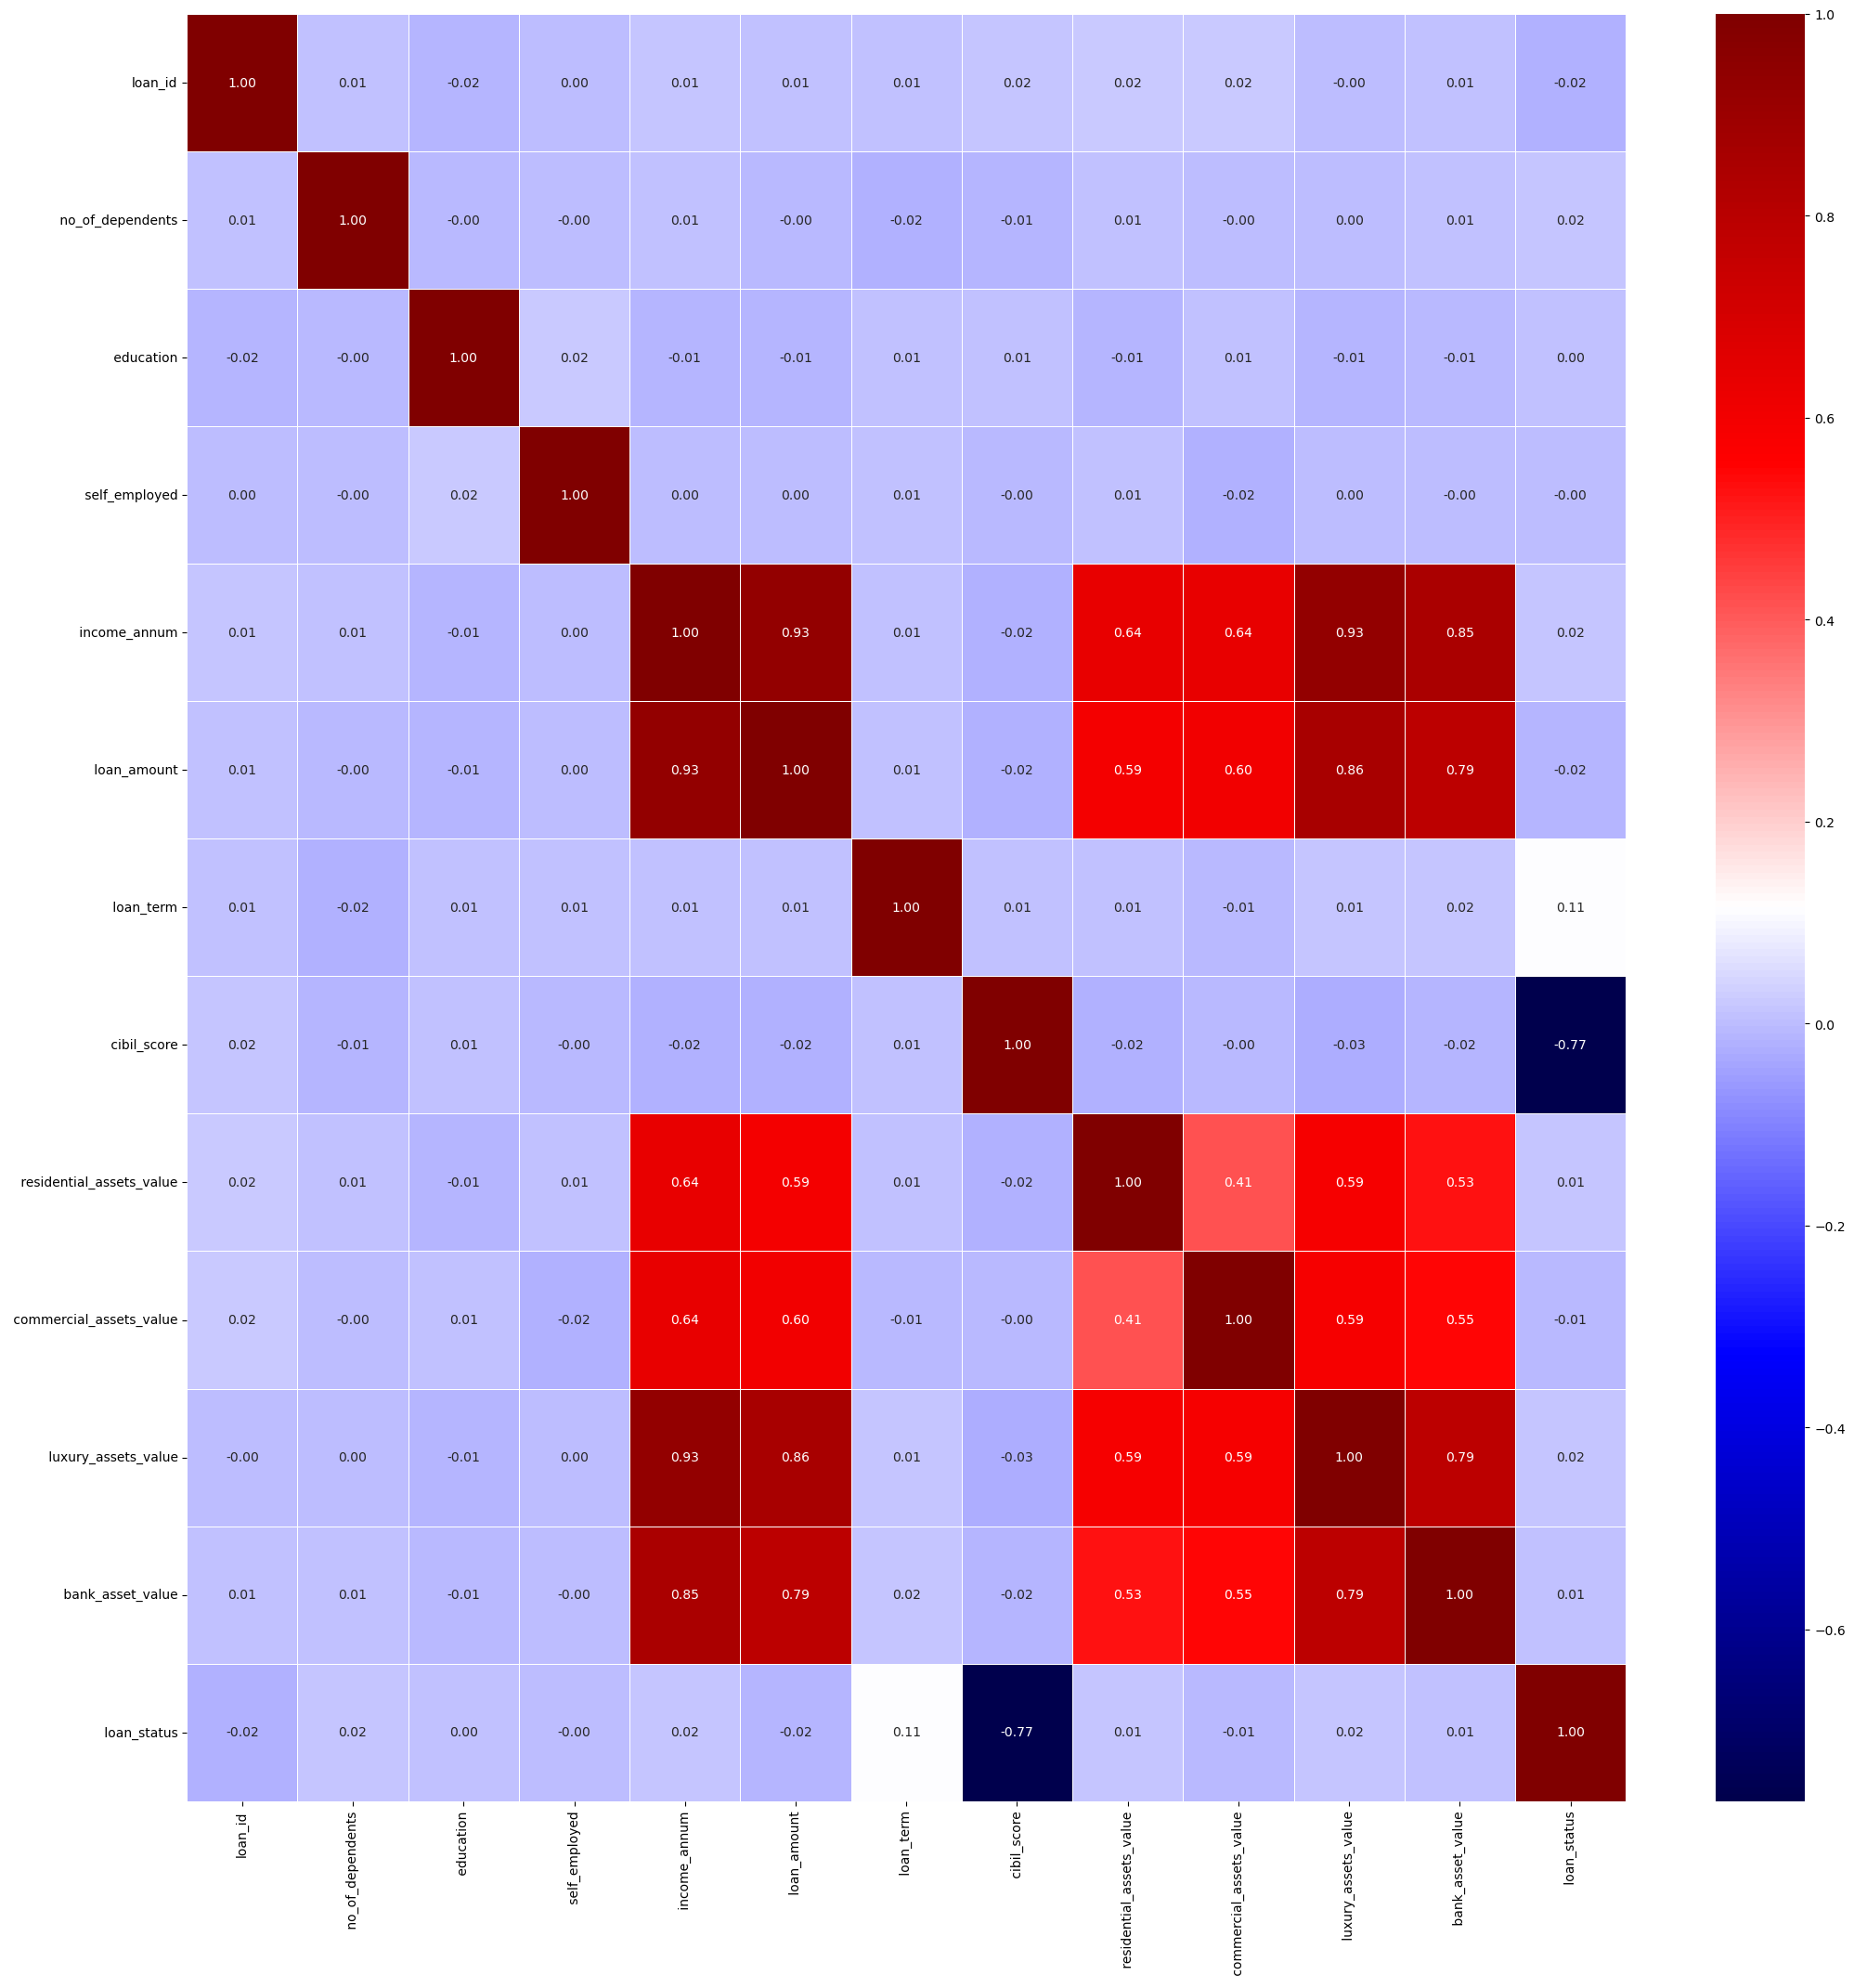

In [28]:
# Quick identify patterns of correlation between different features

correlation_matrix = dataset.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=True, cmap='seismic', linewidths=0.5, fmt='.2f')

In [29]:
# Split the dataset into features (X) and target variable (y)

X = dataset.drop(' loan_status', axis=1)  
y = dataset[' loan_status']

In [30]:
# Data preprocessing (Standardization)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Splitting the Dataset

In [32]:
# Split the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

In [33]:
# Check the shape of X_train and X_test

X_train.shape, X_test.shape

((3842, 12), (427, 12))

In [34]:
# Feature selection

variance_selector = VarianceThreshold(threshold=0.1)
X_trained = variance_selector.fit_transform(X_train)
X_tested = variance_selector.transform(X_test)
print(f"{X_train.shape[1]-X_trained.shape[1]} features have been removed, {X_trained.shape[1]} features remain")

0 features have been removed, 12 features remain


In [35]:
# Feature selection (same way, second try)

variance_selector = VarianceThreshold(threshold=0.5)
X_trained = variance_selector.fit_transform(X_train)
X_tested = variance_selector.transform(X_test)
print(f"{X_train.shape[1]-X_trained.shape[1]} features have been removed, {X_trained.shape[1]} features remain")

0 features have been removed, 12 features remain


In [36]:
# Feature selection (same way, third try)

variance_selector = VarianceThreshold(threshold=0.9)
X_trained = variance_selector.fit_transform(X_train)
X_tested = variance_selector.transform(X_test)
print(f"{X_train.shape[1]-X_trained.shape[1]} features have been removed, {X_trained.shape[1]} features remain")

0 features have been removed, 12 features remain


In [37]:
# Classification

In [38]:
# Training RandomForestClassifier with 100 estimators 

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print('Model accuracy score with 100 decision-trees :', rf_accuracy)

Model accuracy score with 100 decision-trees : 0.9765807962529274


In [39]:
# Make predictions with Decision Tree on the test set 

cm=metrics.confusion_matrix(y_test,rf_predictions)
print('Condusion Matrix:')
print(cm,'\n\n')
result=metrics.classification_report(y_test, rf_predictions)
print('Classification Report:\n')
print(result)

Condusion Matrix:
[[260   4]
 [  6 157]] 


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       264
           1       0.98      0.96      0.97       163

    accuracy                           0.98       427
   macro avg       0.98      0.97      0.98       427
weighted avg       0.98      0.98      0.98       427



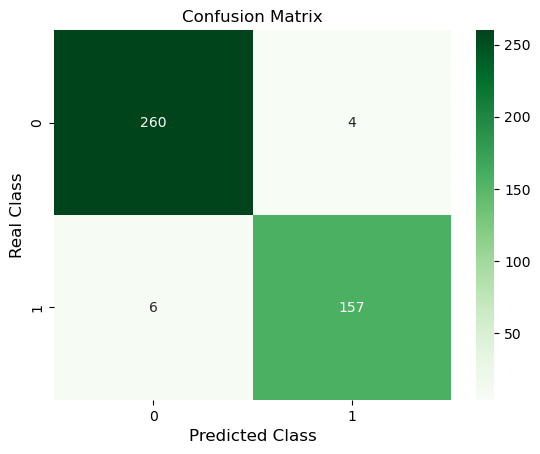

In [40]:
# Display a heatmap of a confusion matrix for Random Forest

ax = sns.heatmap(cm, cmap='Greens',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("Real Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [41]:
# Calculate the feature importances for classifier

feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=X.columns,  columns=['importance']).sort_values('importance', ascending=False)
print("Feature importances:\n", feature_importances)

Feature importances:
                            importance
 cibil_score                 0.814981
 loan_term                   0.056822
 loan_amount                 0.027198
 income_annum                0.016823
loan_id                      0.016388
 luxury_assets_value         0.015475
 residential_assets_value    0.014291
 commercial_assets_value     0.013925
 bank_asset_value            0.013244
 no_of_dependents            0.006676
 self_employed               0.002337
 education                   0.001841


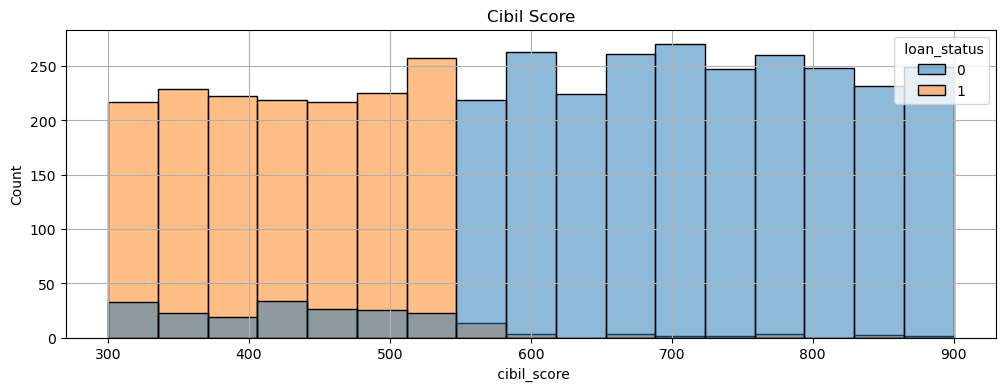

In [42]:
# Visualize the distribution of most important feature in the dataset

plt.figure( figsize=(12, 4))
plt.title("Cibil Score")
sns.histplot(x=' cibil_score', hue=' loan_status', data=dataset)
plt.grid(True)
plt.show()

In [43]:
# Feature selection (second way) based on the importance scores 

sf = SelectFromModel(rf_classifier, threshold=0.01)
sf.fit(X_train, y_train)
X_trained = sf.transform(X_train)
X_tested = sf.transform(X_test)
X_trained.shape, X_tested.shape

((3842, 9), (427, 9))

In [44]:
# Training Decision Tree using the features that have been selected

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_trained, y_train)
dt_predictions = dt_classifier.predict(X_tested)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print('Model accuracy score :', dt_accuracy)

Model accuracy score : 0.9812646370023419


In [45]:
# Make predictions with Decision Tree on the test set 

cm=metrics.confusion_matrix(y_test,dt_predictions)
print('Condusion Matrix:')
print(cm,'\n\n')
result=metrics.classification_report(y_test, dt_predictions)
print('Classification Report:\n')
print(result)

Condusion Matrix:
[[261   3]
 [  5 158]] 


Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       264
           1       0.98      0.97      0.98       163

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427



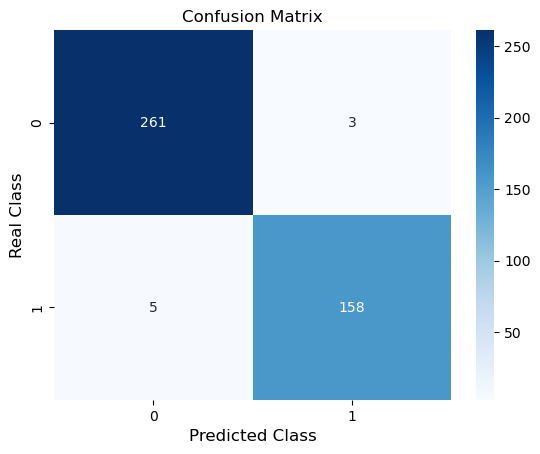

In [46]:
# Display a heatmap of a confusion matrix for Decision Tree

ax = sns.heatmap(cm, cmap='Blues',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("Real Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

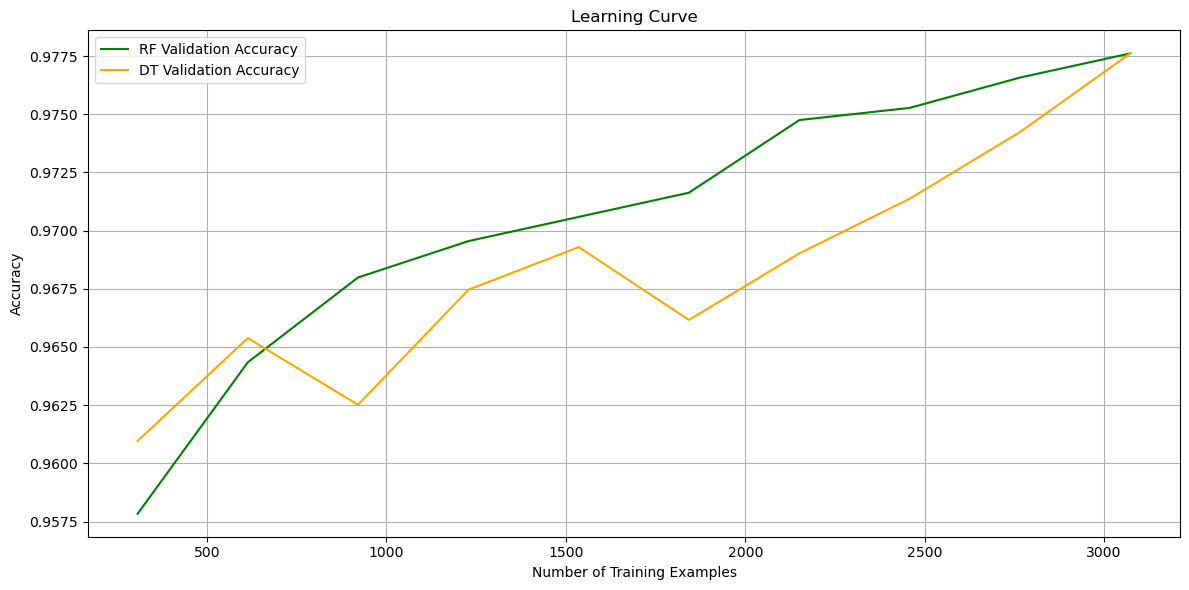

In [47]:
# Plot the learning curves

train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(rf_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
test_mean_rf = np.mean(test_scores_rf, axis=1)

train_sizes_dt, train_scores_dt, test_scores_dt = learning_curve(dt_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
test_mean_dt = np.mean(test_scores_dt, axis=1)

plt.figure(figsize=(12, 6)) 
plt.plot(train_sizes_rf, test_mean_rf, label='RF Validation Accuracy', color='green')
plt.plot(train_sizes_dt, test_mean_dt, label='DT Validation Accuracy', color='orange')
plt.title('Learning Curve')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()

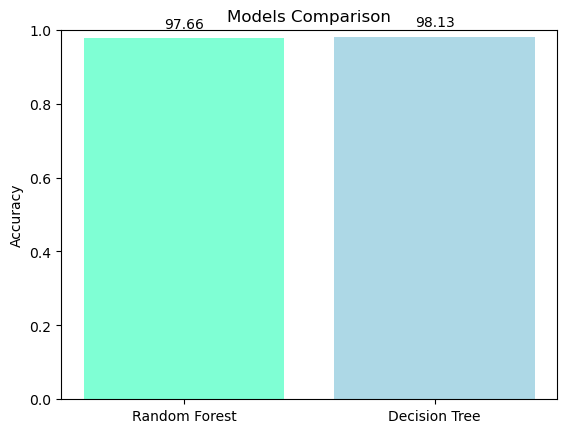

In [48]:
# Compare the accuracies of two models

models = ['Random Forest', 'Decision Tree']
accuracies = [rf_accuracy, dt_accuracy]

plt.bar(models, accuracies, color=['aquamarine', 'lightblue'])
plt.ylabel('Accuracy')
plt.title('Models Comparison')
plt.ylim([0, 1])
for i, v in enumerate(accuracies):
    plt.text(i, v+0.02, f'{v*100:.2f}', ha='center', va='bottom')
plt.show()

In [49]:
# Evaluate both classifiers

print("Random Forest Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

if rf_accuracy > dt_accuracy:
    print("Random Forest performs better.")
else:
    print("Decision Tree performs better.")

Random Forest Accuracy: 0.9765807962529274
Decision Tree Accuracy: 0.9812646370023419
Decision Tree performs better.
